# Web Scraping

In [5]:
import requests
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [54]:
standings_url = "https://fbref.com/en/comps/9/2023-2024/2023-2024-Premier-League-Stats"
standings_url_2023 = "https://fbref.com/en/comps/9/2022-2023/2022-2023-Premier-League-Stats"

In [55]:
data = requests.get(standings_url)
data_2023 = requests.get(standings_url_2023)

In [56]:
from bs4 import BeautifulSoup

In [57]:
data

<Response [200]>

In [43]:
soup = BeautifulSoup(data.text)
soup_2023 = BeautifulSoup(data_2023.text)

In [44]:
standings = soup.select('table.stats_table')[0]

In [45]:
links = standings.find_all('a')
links = [l.get("href") for l in links]
links = [l for l in links if '/squads/' in l]

In [46]:
team_urls = [f"https://fbref.com{l}" for l in links]
for team_url in team_urls:
    team_last = team_url
team_data = requests.get(team_last)

In [47]:
# List to hold all player stats DataFrames
all_players_stats = []
# List to keep track of processed team names
processed_teams = []
standings_url = "https://fbref.com/en/comps/9/2023-2024/2023-2024-Premier-League-Stats"
years = list(range(2024, 2022, -1))

In [59]:
for team_url in team_urls:
        team_name = team_url.split('/')[-1].replace("-Stats", "").replace("-", "")
        if team_name in processed_teams:
            continue
        team_data = requests.get(team_url)
        team_player_stats = pd.read_html(team_data.text, match="Standard Stats")[0]
        team_player_stats['Team'] = team_name
        all_players_stats.append(team_player_stats)
        processed_teams.append(team_name)

In [60]:
processed_teams

['ManchesterCity',
 'Arsenal',
 'Liverpool',
 'AstonVilla',
 'TottenhamHotspur',
 'Chelsea',
 'NewcastleUnited',
 'ManchesterUnited',
 'WestHamUnited',
 'CrystalPalace',
 'BrightonandHoveAlbion',
 'Bournemouth',
 'Fulham',
 'WolverhamptonWanderers',
 'Everton',
 'Brentford',
 'NottinghamForest',
 'LutonTown',
 'Burnley',
 'SheffieldUnited']

In [61]:
combined_df = pd.concat(all_players_stats, ignore_index=True)
combined_df[combined_df['Team'] == 'Arsenal']

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                 Player             Nation                Pos   
32       William Saliba             fr FRA                 DF   
33          Declan Rice            eng ENG                 MF   
34      Martin Ødegaard             no NOR                 MF   
35            Ben White            eng ENG                 DF   
36          Bukayo Saka            eng ENG                 FW   
37    Gabriel Magalhães             br BRA                 DF   
38           David Raya             es ESP                 GK   
39          Kai Havertz             de GER              MF,FW   
40   Gabriel Martinelli             br BRA                 FW   
41  Oleksandr Zinchenko             ua UKR                 DF   
42     Leandro Trossard             be BEL              FW,MF   
43        Gabriel Jesus             br BRA                 FW   
44         Jakub Kiwior             pl POL                 DF   
45    Takehiro Tomiyasu             jp JPN                 DF   
46        Eddie Nketiah            eng ENG                 FW   
47             Jorginho             it ITA                 MF   
48        Thomas Partey             gh GHA              MF,DF   
49       Aaron Ramsdale            eng ENG                 GK   
50     Emile Smith Rowe            eng ENG                 MF   
51         Fabio Vieira             pt POR              MF,FW   
52         Reiss Nelson            eng ENG                 FW   
53       Jurriën Timber             nl NED                 DF   
54        Cédric Soares             pt POR                 DF   
55       Mohamed Elneny             eg EGY                 MF   
56        Ethan Nwaneri            eng ENG                 FW   
57       Mauro Bandeira             pt POR                 MF   
58      Bradley Ibrahim            eng ENG                 MF   
59      Karl Jakob Hein             ee EST                 GK   
60   Myles Lewis-Skelly            eng ENG                 MF   
61     Charles Sagoe Jr            eng ENG                 FW   
62          James Sweet            wls WAL                 DF   
63       Reuell Walters            eng ENG                 DF   
64          Squad Total                NaN                NaN   
65       Opponent Total                NaN                NaN   

   Unnamed: 3_level_0 Playing Time                      Performance        \
                  Age           MP Starts     Min   90s         Gls   Ast   
32               22.0         38.0     38  3420.0  38.0         2.0   1.0   
33               24.0         38.0     37  3225.0  35.8         7.0   8.0   
34               24.0         35.0     35  3091.0  34.3         8.0  10.0   
35               25.0         37.0     35  2988.0  33.2         4.0   4.0   
36               21.0         35.0     35  2919.0  32.4        16.0   9.0   
37               25.0         36.0     34  3044.0  33.8         4.0   0.0   
38               27.0         32.0     32  2880.0  32.0         0.0   0.0   
39               24.0         37.0     30  2634.0  29.3        13.0   7.0   
40               22.0         35.0     24  2019.0  22.4         6.0   4.0   
41               26.0         27.0     20  1722.0  19.1         1.0   2.0   
42               28.0         34.0     18  1649.0  18.3        12.0   1.0   
43               26.0         27.0     17  1478.0  16.4         4.0   5.0   
44               23.0         20.0     11   946.0  10.5         1.0   3.0   
45               24.0         22.0     10  1149.0  12.8         2.0   1.0   
46               24.0         27.0     10  1082.0  12.0         5.0   2.0   
47               31.0         24.0     10   921.0  10.2         0.0   2.0   
48               30.0         14.0      9   788.0   8.8         0.0   0.0   
49               25.0          6.0      6   540.0   6.0         0.0   0.0   
50               23.0         13.0      3   353.0   3.9         0.0   1.0   
51               23.0         11.0      2   297

In [62]:
processed_teams_2023 = []

In [63]:
standings_2023 = soup_2023.select('table.stats_table')[0]
links_2023 = standings_2023.find_all('a')
links_2023 = [l.get("href") for l in links_2023]
links_2023 = [l for l in links if '/squads/' in l]
team_urls_2023 = [f"https://fbref.com{l}" for l in links_2023]
all_players_stats_2023 = []
for team_url in team_urls_2023:
        team_name = team_url.split('/')[-1].replace("-Stats", "").replace("-", "")
        if team_name in processed_teams_2023:
            continue
        team_data = requests.get(team_url)
        team_player_stats = pd.read_html(team_data.text, match="Standard Stats")[0]
        team_player_stats['Team'] = team_name
        all_players_stats_2023.append(team_player_stats)
        processed_teams_2023.append(team_name)

ValueError: No tables found

In [64]:
processed_teams_2023

['ManchesterCity',
 'Arsenal',
 'Liverpool',
 'AstonVilla',
 'TottenhamHotspur',
 'Chelsea']

In [65]:
combined_df_2023 = pd.concat(all_players_stats_2023, ignore_index=True)
combined_df_2023

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                Player             Nation                Pos   
0                Rodri             es ESP                 MF   
1           Phil Foden            eng ENG              FW,MF   
2              Ederson             br BRA                 GK   
3       Julián Álvarez             ar ARG              MF,FW   
4          Kyle Walker            eng ENG                 DF   
..                 ...                ...                ...   
230      Teddy Sharman            eng ENG                 GK   
231         Zak Sturge            eng ENG                 DF   
232     Ronnie Stutter            eng ENG                 FW   
233        Squad Total                NaN                NaN   
234     Opponent Total                NaN                NaN   

    Unnamed: 3_level_0 Playing Time                      Performance        \
                   Age           MP Starts     Min   90s         Gls   Ast   
0                 27.0         34.0     34  2931.0  32.6         8.0   9.0   
1                 23.0         35.0     33  2857.0  31.7        19.0   8.0   
2                 29.0         33.0     33  2785.0  30.9         0.0   0.0   
3                 23.0         36.0     31  2647.0  29.4        11.0   8.0   
4                 33.0         32.0     30  2767.0  30.7         0.0   4.0   
..                 ...          ...    ...     ...   ...         ...   ...   
230               20.0          0.0      0     NaN   NaN         NaN   NaN   
231               19.0          0.0      0     NaN   NaN         NaN   NaN   
232               18.0          0.0      0     NaN   NaN         NaN   NaN   
233               24.2         38.0    418  3420.0  38.0        76.0  51.0   
234               26.3         38.0    418  3420.0  38.0        60.0  43.0   

     ... Per 90 Minutes                                           \
     ...           G-PK G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG   
0    ...           0.25   0.52  0.12  0.12   0.24  0.12     0.24   
1    ...           0.60   0.85  0.33  0.26   0.59  0.33     0.59   
2    ...           0.00   0.00  0.00  0.00   0.00  0.00     0.00   
3    ...           0.31   0.58  0.44  0.22   0.66  0.39     0.61   
4    ...           0.00   0.13  0.01  0.09   0.10  0.01     0.10   
..   ...            ...    ...   ...   ...    ...   ...      ...   
230  ...            NaN    NaN   NaN   NaN    NaN   NaN      NaN   
231  ...            NaN    NaN   NaN   NaN    NaN   NaN      NaN   
232  ...            NaN    NaN   NaN   NaN    NaN   NaN      NaN   
233  ...           1.71   3.05  1.96  1.35   3.31  1.71     3.06   
234  ...           1.50   2.63  1.53  1.10   2.63  1.42     2.53   

    Unnamed: 33_level_0            Team Unnamed: 4_level_0  
                Matches                                 MP  
0               Matches  ManchesterCity                NaN  
1               Matches  ManchesterCity                NaN  
2               Matches  ManchesterCity                NaN  
3               Matches  ManchesterCity                NaN  
4               Matches  ManchesterCity                NaN  
..                  ...             ...                ...  
230             Matches         Chelsea                NaN  
231             Matches         Chelsea                NaN  
232             Matches         Chelsea                NaN  
233                 NaN         Chelsea                NaN  
234                 NaN         Chelsea                NaN  

[235 rows x 36 columns]

In [66]:
fpl_stats = pd.read_csv("/Users/parthsandeep/Desktop/cleaned_players.csv")
fpl_stats

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type
0,Folarin,Balogun,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.2,44,FWD
1,Cédric,Alves Soares,0,0,3,59,0,4.3,2.0,0.0,0,15,0.6,0,0,0,0.5,38,DEF
2,Mohamed,Elneny,0,1,6,25,0,2.1,4.0,10.0,0,16,1.6,0,0,0,0.1,44,MID
3,Fábio,Ferreira Vieira,1,3,24,290,2,88.8,82.8,85.0,0,67,25.5,1,1,0,0.1,54,MID
4,Gabriel,dos Santos Magalhães,3,1,149,3042,26,121.9,675.8,379.0,8,676,117.9,16,0,4,28.3,54,DEF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,Noha,Lemina,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,50,MID
861,Wesley,Okoduwa,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,40,DEF
862,Leon,Chiwome,0,0,5,173,4,1.2,7.8,13.0,0,12,2.2,0,0,0,0.0,45,FWD
863,Fletcher,Holman,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,45,FWD


In [67]:
combined_df.columns = [col[1] if col[0] else col[1] for col in combined_df.columns.values]

In [68]:
combined_df = combined_df.rename(columns = {'':'Team'})

In [69]:
fpl_stats['Player'] = fpl_stats['first_name'] + ' ' + fpl_stats['second_name']
fpl_stats[fpl_stats['first_name'] == 'Gabriel']

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,Player
4,Gabriel,dos Santos Magalhães,3,1,149,3042,26,121.9,675.8,379.0,8,676,117.9,16,0,4,28.3,54,DEF,Gabriel dos Santos Magalhães
6,Gabriel,Fernando de Jesus,4,7,85,1470,11,403.0,364.8,756.0,10,271,152.7,11,0,6,2.6,77,FWD,Gabriel Fernando de Jesus
10,Gabriel,Martinelli Silva,6,5,118,2010,23,717.1,500.4,795.0,6,404,200.8,10,0,1,4.2,75,MID,Gabriel Martinelli Silva
285,Gabriel,Słonina,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,40,GK,Gabriel Słonina
488,Gabriel,Osho,2,0,41,1846,47,37.9,448.6,103.0,1,286,59.0,2,0,3,0.1,44,DEF,Gabriel Osho


# Cleaning

In [70]:
name_mapping = {
    'Benjamin White': 'Ben White',
    'Gabriel dos Santos Magalhães': 'Gabriel Magalhães',
     'Gabriel Martinelli Silva': 'Gabriel Martinelli'
}

# Apply the mapping to both DataFrames
combined_df['Player'] = combined_df['Player'].replace(name_mapping)
fpl_stats['Player'] = fpl_stats['Player'].replace(name_mapping)

In [71]:
merged_df = pd.merge(combined_df, fpl_stats, on='Player', how='inner')

In [72]:
merged_df = merged_df.fillna(0)
merged_df

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type
0,Phil Foden,eng ENG,"FW,MF",23.0,35.0,33,2857.0,31.7,19.0,8.0,...,1172.0,31,866,348.8,14,0,2,43.3,85,MID
1,Julián Álvarez,ar ARG,"MF,FW",23.0,36.0,31,2647.0,29.4,11.0,8.0,...,992.0,17,662,273.3,12,0,2,15.4,64,FWD
2,Kyle Walker,eng ENG,DF,33.0,32.0,30,2767.0,30.7,0.0,4.0,...,126.0,13,633,112.6,10,0,2,15.1,55,DEF
3,Erling Haaland,no NOR,FW,23.0,31.0,29,2552.0,28.4,27.0,5.0,...,1581.0,29,792,303.3,11,0,1,73.6,143,FWD
4,Manuel Akanji,ch SUI,"DF,MF",28.0,30.0,28,2511.0,27.9,2.0,0.0,...,137.0,8,560,97.4,11,1,2,5.6,50,DEF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,Adam Davies,wls WAL,GK,31.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0,0,0.2,40,GK
593,Owen Hampson,eng ENG,MF,18.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0,0,0.0,45,MID
594,Louie Marsh,eng ENG,FW,19.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0,0,0.0,45,FWD
595,Dovydas Sasnauskas,0,DF,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0,0,0.0,40,DEF


In [73]:
merged_df.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls', 'Ast', 'G+A', 'G-PK',
       'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG', 'Matches', 'Team',
       'MP', 'first_name', 'second_name', 'goals_scored', 'assists',
       'total_points', 'minutes', 'goals_conceded', 'creativity', 'influence',
       'threat', 'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'selected_by_percent', 'now_cost', 'element_type'],
      dtype='object')

In [74]:
model_df = merged_df.drop(columns=['first_name', 'second_name', 'G+A', 'npxG+xAG', 'Matches', 'MP', 'goals_scored', 'assists', 'minutes', 'red_cards', 'yellow_cards'])

In [75]:
model_df

,Player,Nation,Pos,Age,Starts,Min,90s,Gls,Ast,G-PK,...,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,selected_by_percent,now_cost,element_type
0,Phil Foden,eng ENG,"FW,MF",23.0,33,2857.0,31.7,19.0,8.0,19.0,...,1157.8,1154.8,1172.0,31,866,348.8,14,43.3,85,MID
1,Julián Álvarez,ar ARG,"MF,FW",23.0,31,2647.0,29.4,11.0,8.0,9.0,...,1005.2,737.0,992.0,17,662,273.3,12,15.4,64,FWD
2,Kyle Walker,eng ENG,DF,33.0,30,2767.0,30.7,0.0,4.0,0.0,...,534.1,465.4,126.0,13,633,112.6,10,15.1,55,DEF
3,Erling Haaland,no NOR,FW,23.0,29,2552.0,28.4,27.0,5.0,20.0,...,367.2,1094.6,1581.0,29,792,303.3,11,73.6,143,FWD
4,Manuel Akanji,ch SUI,"DF,MF",28.0,28,2511.0,27.9,2.0,0.0,2.0,...,298.7,536.4,137.0,8,560,97.4,11,5.6,50,DEF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,Adam Davies,wls WAL,GK,31.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0,0.2,40,GK
593,Owen Hampson,eng ENG,MF,18.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0,0.0,45,MID
594,Louie Marsh,eng ENG,FW,19.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0,0.0,45,FWD
595,Dovydas Sasnauskas,0,DF,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0,0.0,40,DEF


In [76]:
from sklearn.preprocessing import LabelEncoder
model_df = merged_df.drop(columns=['Pos', 'first_name', 'second_name', 'G+A', 'npxG+xAG', 'Matches', 'MP', 'goals_scored', 'assists', 'minutes', 'red_cards', 'yellow_cards'])
label_encoder = LabelEncoder()
model_df['element_type'] = label_encoder.fit_transform(merged_df['element_type'])

In [77]:
model_df = model_df.sort_values('Min', ascending = False).drop_duplicates('Player')
model_df = model_df.sort_values('Team').reset_index().drop(columns = ['index', 'level_0'])

KeyError: "['index' 'level_0'] not found in axis"

In [78]:
model_df = model_df.loc[:, ~model_df.columns.duplicated()]
model_df

,Player,Nation,Age,Starts,Min,90s,Gls,Ast,G-PK,PK,...,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,selected_by_percent,now_cost,element_type
206,André Onana,cm CMR,27.0,38,3420.0,38.0,0.0,0.0,0.0,0.0,...,33.2,1167.8,0.0,10,741,120.2,9,15.5,50,2
389,Max Kilman,eng ENG,26.0,38,3420.0,38.0,2.0,0.0,2.0,0.0,...,233.1,853.6,212.0,3,592,130.2,5,1.7,44,0
24,William Saliba,fr FRA,22.0,38,3420.0,38.0,2.0,1.0,2.0,0.0,...,152.1,697.2,140.0,13,781,99.1,18,39.1,59,0
108,Guglielmo Vicario,it ITA,26.0,38,3420.0,38.0,0.0,0.0,0.0,0.0,...,0.0,974.2,0.0,9,730,97.4,7,9.4,53,2
362,Bernd Leno,de GER,31.0,38,3420.0,38.0,0.0,0.0,0.0,0.0,...,0.1,1069.8,0.0,15,782,106.7,10,14.6,48,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,Gavin Kilkenny,ie IRL,23.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0,0.1,43,3
360,Emiliano Marcondes,dk DEN,28.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0,0.0,43,3
361,Darren Randolph,ie IRL,36.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0,0.4,39,2
381,Marek Rodák,sk SVK,26.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,-3,0.0,0,0.3,39,2


In [79]:
model_df.columns

Index(['Player', 'Nation', 'Age', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G-PK',
       'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'PrgC', 'PrgP',
       'PrgR', 'G+A-PK', 'xG+xAG', 'Team', 'total_points', 'goals_conceded',
       'creativity', 'influence', 'threat', 'bonus', 'bps', 'ict_index',
       'clean_sheets', 'selected_by_percent', 'now_cost', 'element_type'],
      dtype='object')

# Exploratory Data 

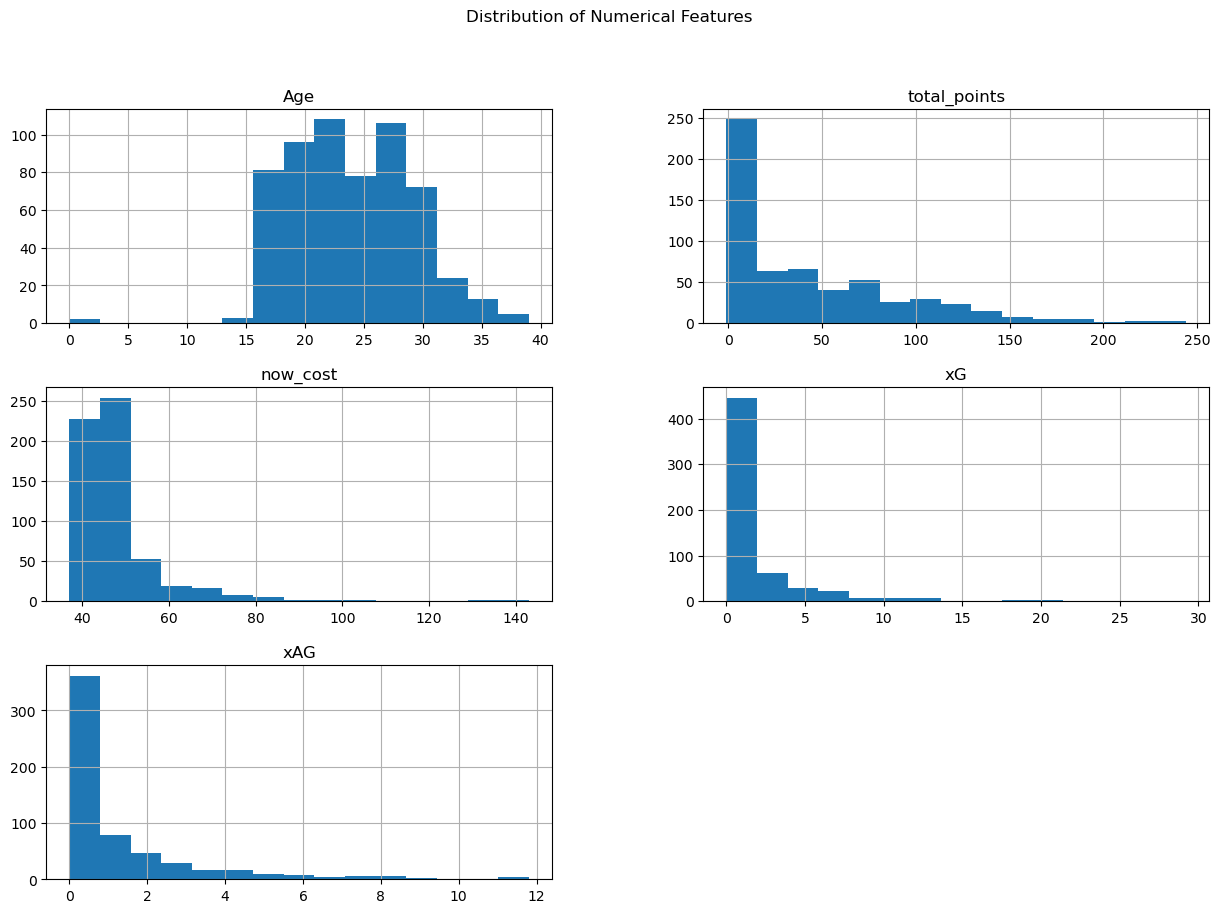

In [80]:
import matplotlib.pyplot as plt

numerical_features = ['Age', 'total_points', 'now_cost', 'xG', 'xAG']

model_df[numerical_features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

/var/folders/27/h6tyzm312g76r55hnzyj491h0000gn/T/ipykernel_16850/1678487278.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = model_df.corr()


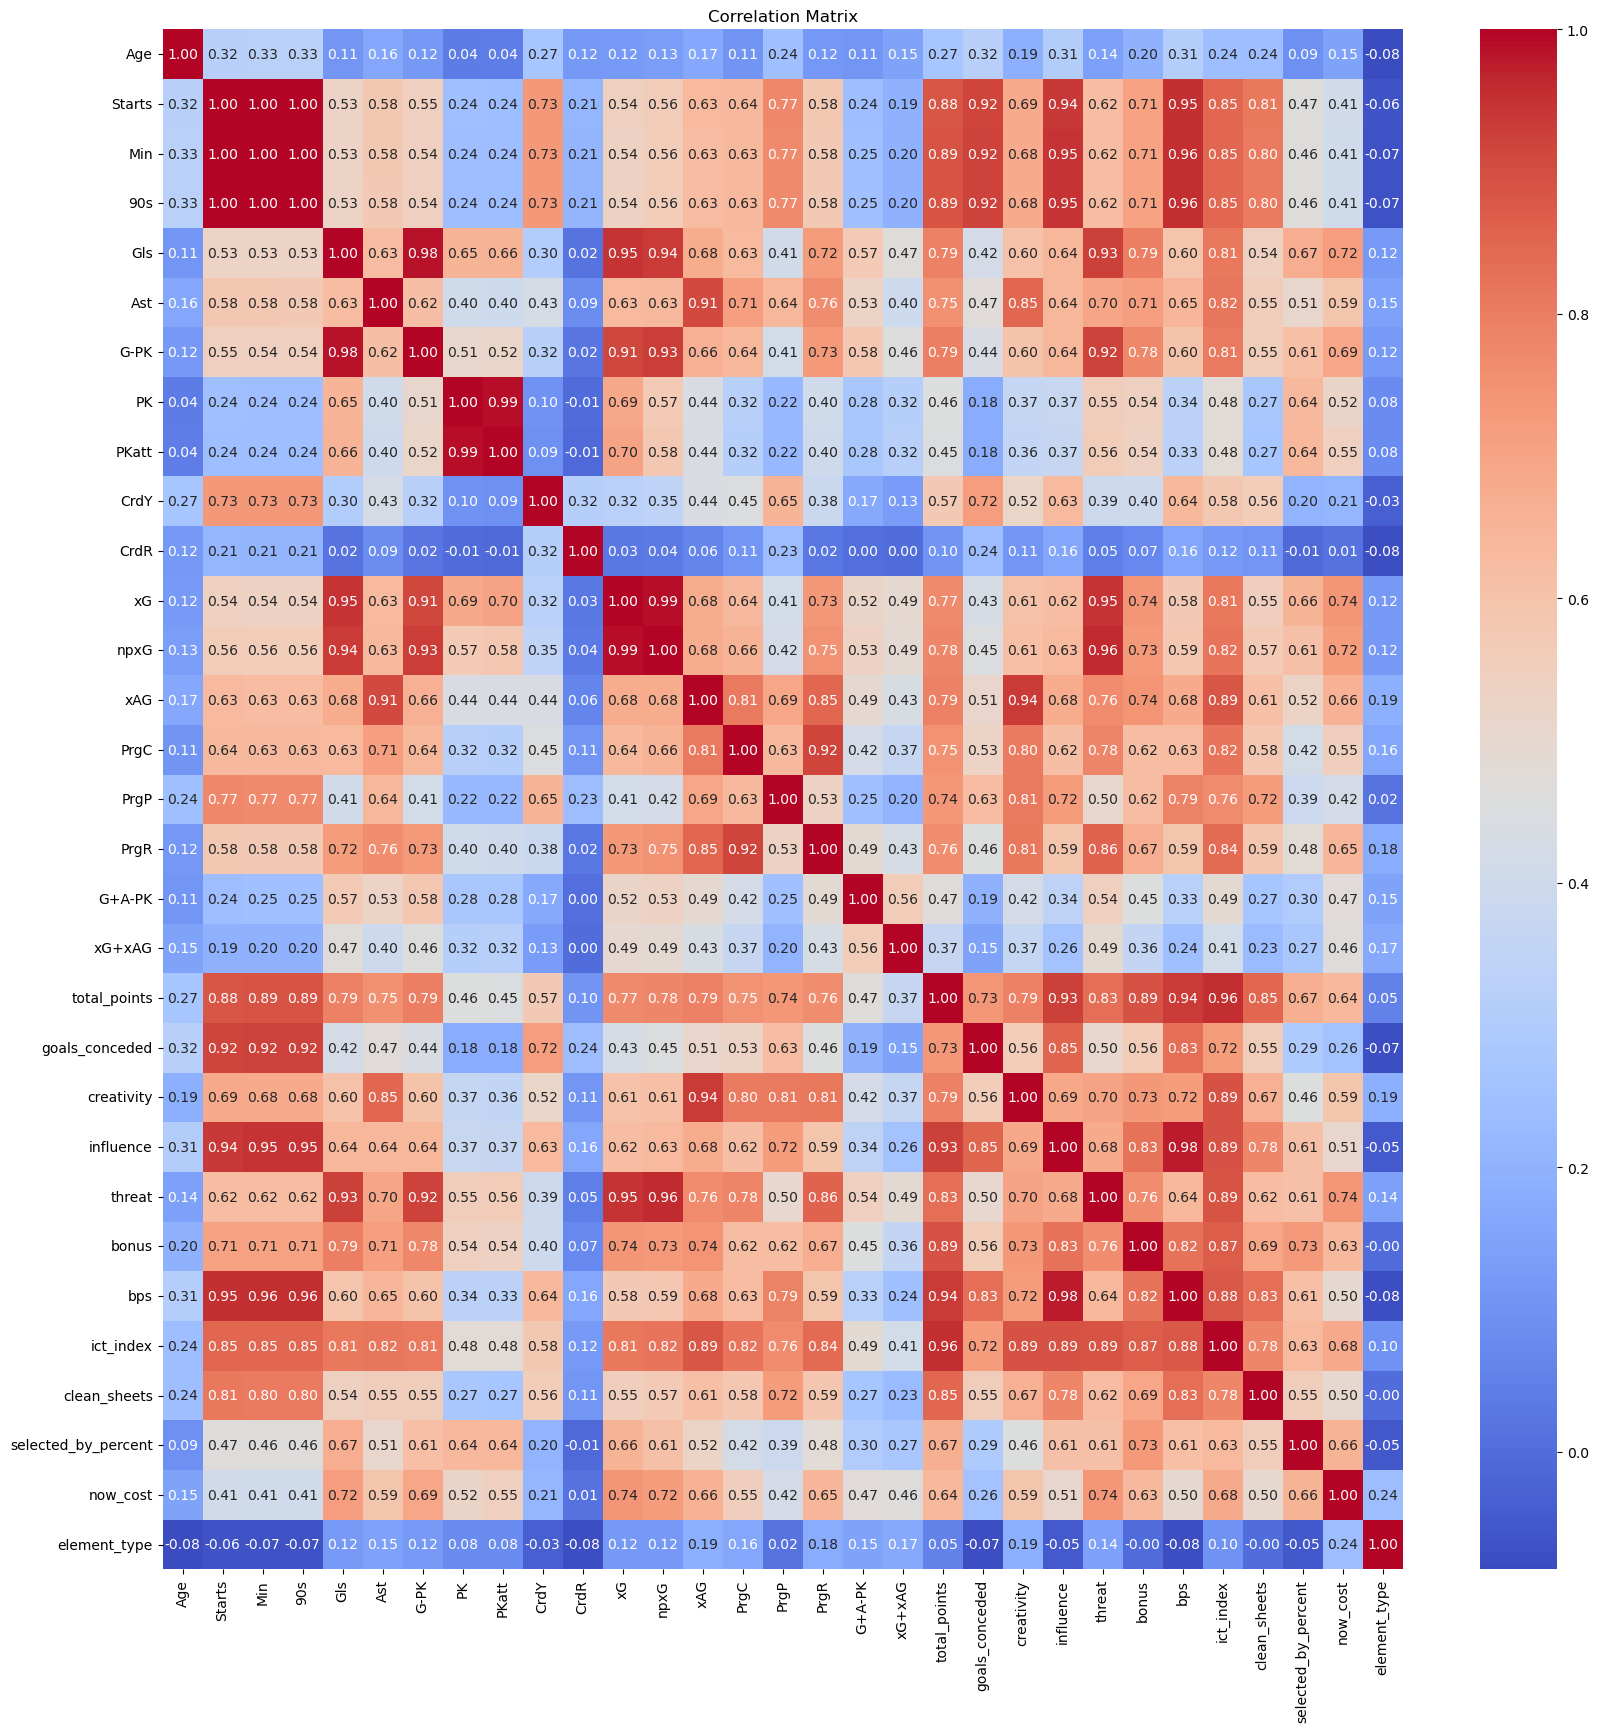

In [81]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = model_df.corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

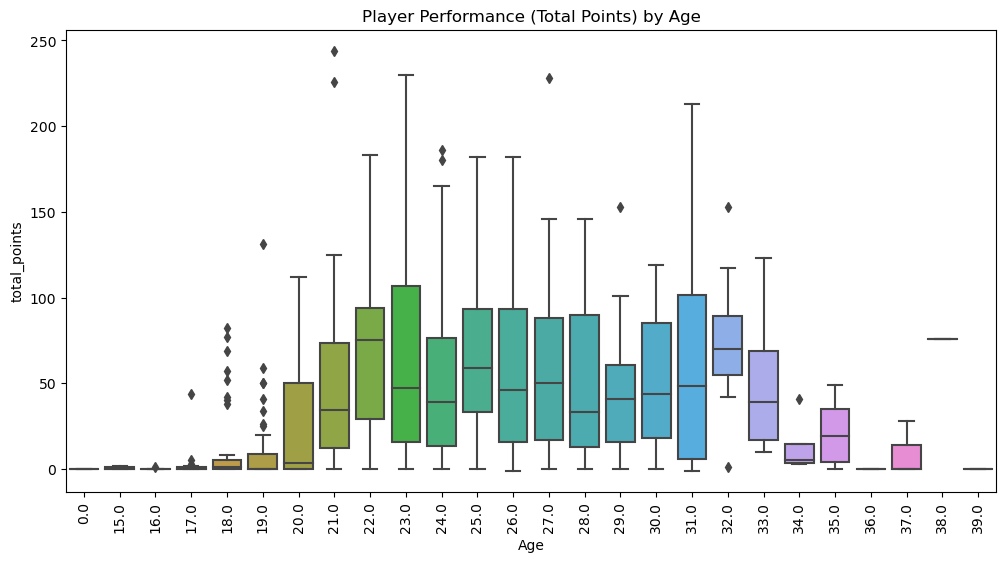

In [82]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='total_points', data=model_df)
plt.title('Player Performance (Total Points) by Age')
plt.xticks(rotation=90)
plt.show()

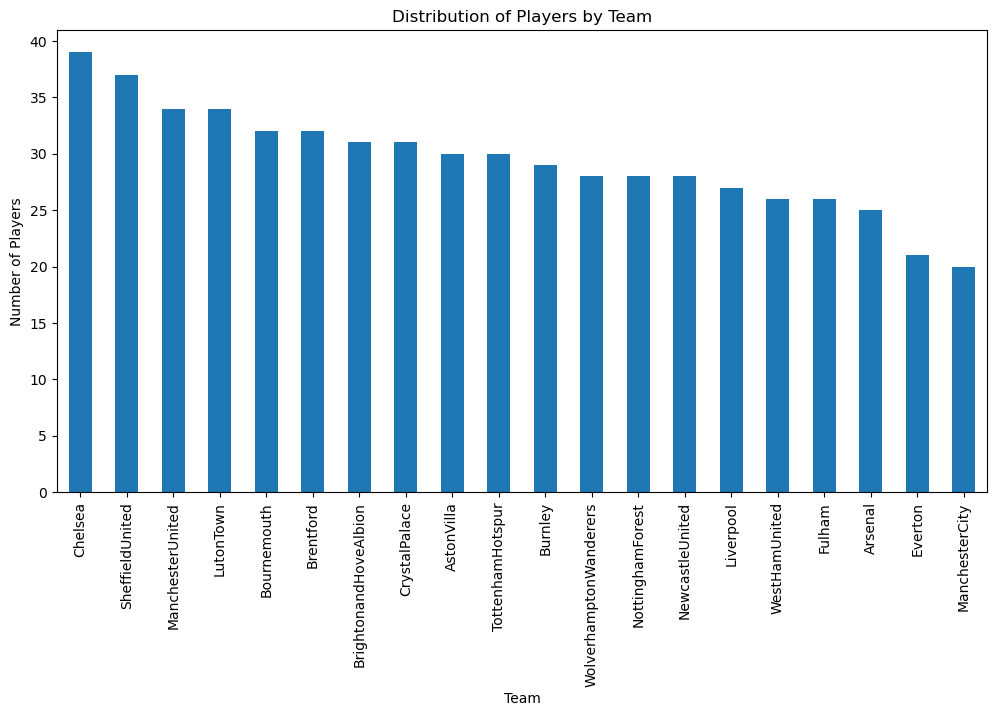

In [83]:
plt.figure(figsize=(12, 6))
model_df['Team'].value_counts().plot(kind='bar')
plt.title('Distribution of Players by Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.show()

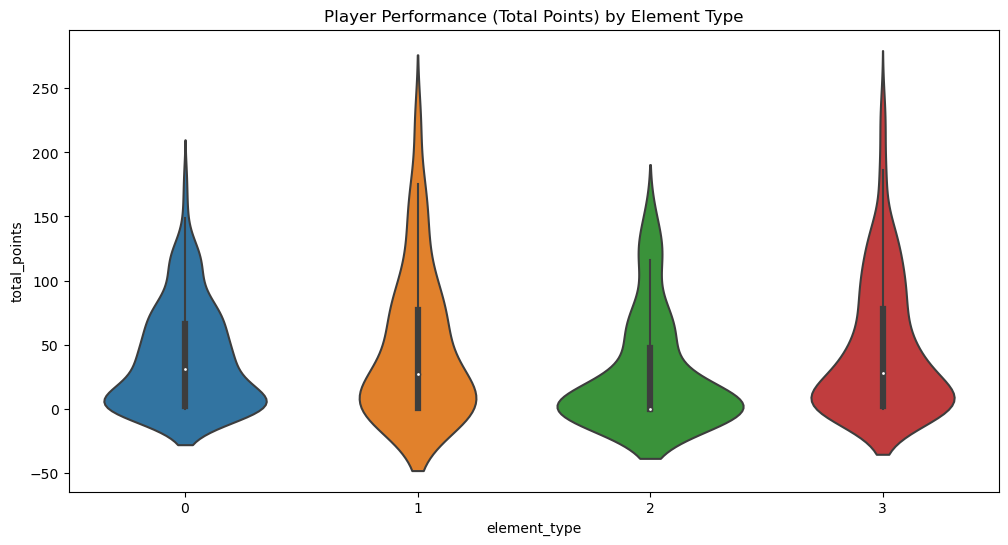

0 = DEF, 1 = FWD, 2 = GK, 3 = MID


In [84]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='element_type', y='total_points', data=model_df)
plt.title('Player Performance (Total Points) by Element Type')
plt.show()
print('0 = DEF, 1 = FWD, 2 = GK, 3 = MID')

In [85]:
model_df['Points_per_90'] = np.where(model_df['90s'] != 0, model_df['total_points'] / model_df['90s'], 0)

In [86]:
model_df[model_df['Team'] == 'Arsenal']

,Player,Nation,Age,Starts,Min,90s,Gls,Ast,G-PK,PK,...,influence,threat,bonus,bps,ict_index,clean_sheets,selected_by_percent,now_cost,element_type,Points_per_90
24,William Saliba,fr FRA,22.0,38,3420.0,38.0,2.0,1.0,2.0,0.0,...,697.2,140.0,13,781,99.1,18,39.1,59,0,4.315789
25,Declan Rice,eng ENG,24.0,37,3225.0,35.8,7.0,8.0,7.0,0.0,...,959.4,451.0,17,744,215.9,17,6.2,55,3,4.608939
26,Martin Ødegaard,no NOR,24.0,35,3091.0,34.3,8.0,10.0,6.0,2.0,...,910.4,757.0,26,703,317.0,19,18.0,86,3,5.422741
29,Gabriel Magalhães,br BRA,25.0,34,3044.0,33.8,4.0,0.0,4.0,0.0,...,675.8,379.0,8,676,117.9,16,28.3,54,0,4.408284
27,Ben White,eng ENG,25.0,35,2988.0,33.2,4.0,4.0,4.0,0.0,...,765.8,234.0,14,776,159.0,18,23.3,61,0,5.481928
28,Bukayo Saka,eng ENG,21.0,35,2919.0,32.4,16.0,9.0,10.0,6.0,...,1093.8,1342.0,29,776,375.7,16,49.2,88,3,6.975309
30,Kai Havertz,de GER,24.0,30,2634.0,29.3,13.0,7.0,12.0,1.0,...,763.2,1027.0,15,515,240.2,16,11.9,76,3,6.143345
31,Gabriel Martinelli,br BRA,22.0,24,2019.0,22.4,6.0,4.0,6.0,0.0,...,500.4,795.0,6,404,200.8,10,4.2,75,3,5.267857
32,Oleksandr Zinchenko,ua UKR,26.0,20,1722.0,19.1,1.0,2.0,1.0,0.0,...,395.4,133.0,16,468,100.4,9,5.1,50,0,5.445026
33,Leandro Trossard,be BEL,28.0,18,1649.0,18.3,12.0,1.0,12.0,0.0,...,563.6,746.0,11,398,169.5,12,3.6,66,3,7.540984


# Prediction

In [95]:
features = ['Starts', 'Min', '90s', 'Gls', 'Ast', 'G-PK',
       'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'PrgC', 'PrgP',
       'PrgR', 'G+A-PK', 'xG+xAG',
        'goals_conceded', 'creativity', 'influence',
       'threat', 'bonus', 'bps', 'ict_index', 'clean_sheets',
       'selected_by_percent', 'now_cost', 'element_type', "Points_per_90"]
X = model_df[features_]
y = model_df['total_points']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [96]:
model_df[features_]

,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,...,influence,threat,bonus,bps,ict_index,clean_sheets,selected_by_percent,now_cost,element_type,Points_per_90
206,38,3420.0,38.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,1167.8,0.0,10,741,120.2,9,15.5,50,2,3.500000
389,38,3420.0,38.0,2.0,0.0,2.0,0.0,0.0,7.0,0.0,...,853.6,212.0,3,592,130.2,5,1.7,44,0,2.157895
24,38,3420.0,38.0,2.0,1.0,2.0,0.0,0.0,4.0,0.0,...,697.2,140.0,13,781,99.1,18,39.1,59,0,4.315789
108,38,3420.0,38.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,974.2,0.0,9,730,97.4,7,9.4,53,2,2.947368
362,38,3420.0,38.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1069.8,0.0,15,782,106.7,10,14.6,48,2,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0,0.1,43,3,0.000000
360,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,43,3,0.000000
361,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0,0.4,39,2,0.000000
381,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0,-3,0.0,0,0.3,39,2,0.000000


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [99]:
y_pred_rf = rf.predict(X_test)

In [100]:
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 46.9042279661017
R-squared: 0.9807968295241234


In [101]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(len(importances)):
    print(f"{features[indices[f]]}: {importances[indices[f]] *100}")

Feature ranking:
ict_index: 85.43100806316193
bps: 4.080232456017542
bonus: 2.22246331722906
selected_by_percent: 1.5822381306861082
influence: 1.2729696001770345
Gls: 1.1540157580200727
Points_per_90: 0.9715305530796631
clean_sheets: 0.6752199681169435
xG: 0.2650566156464447
npxG: 0.2502750028179178
Starts: 0.22658144568768243
now_cost: 0.21212323903361946
threat: 0.18341679597775093
90s: 0.16108250168102134
Min: 0.15410555348850996
G-PK: 0.13406614442888082
xG+xAG: 0.12762330496103205
G+A-PK: 0.11797121054712831
PrgR: 0.1065723891671901
CrdY: 0.0990602867313672
xAG: 0.08378321712704051
PrgC: 0.08356211418453742
creativity: 0.08132745664410959
goals_conceded: 0.07849833077156415
PrgP: 0.07804160556633179
Ast: 0.058373083554195924
CrdR: 0.033737198114310654
element_type: 0.029121009671021467
PK: 0.02729582356948249
PKatt: 0.0186478241405116


In [103]:
def process_element_type(df, element_type_value):
    df_filtered = df[df['element_type'] == element_type_value]
    
    if df_filtered.empty:
        return pd.DataFrame({'Player': [], 'Predicted_Points': []})

    features_ = ['Starts', 'Min', '90s', 'Gls', 'Ast', 'G-PK',
       'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'PrgC', 'PrgP',
       'PrgR', 'G+A-PK', 'xG+xAG',
        'goals_conceded', 'creativity', 'influence',
       'threat', 'bonus', 'bps', 'ict_index', 'clean_sheets',
       'selected_by_percent', 'now_cost', 'element_type', "Points_per_90"]
    X = df_filtered[features]
    y = df_filtered['total_points']

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)

    predictions = rf.predict(X)

    draft_board = pd.DataFrame({
        'Player': df_filtered['Player'],
        'Predicted_Points': predictions
    })

    draft_board = draft_board.sort_values(by='Predicted_Points', ascending=False)
    
    return draft_board

element_types = model_df['element_type'].unique()
draft_boards = {}

for et in element_types:
    draft_boards[et] = process_element_type(model_df, et)
    print(f"\nDraft Board for {et}:")
    print(draft_boards[et])


Draft Board for 2:
                 Player  Predicted_Points
417     Jordan Pickford            140.65
206         André Onana            132.10
362          Bernd Leno            128.38
108   Guglielmo Vicario            113.34
440        Mark Flekken            110.35
249     Alphonse Areola            108.22
498     Thomas Kaminski             93.76
143      Đorđe Petrović             75.07
565     Wes Foderingham             74.66
534      James Trafford             70.64
304     Bart Verbruggen             68.17
278       Sam Johnstone             64.15
148      Robert Sánchez             56.38
185           Nick Pope             50.30
238      Dean Henderson             48.75
546      Arijanet Muric             47.84
307        Jason Steele             45.13
479         Matt Turner             44.21
480           Matz Sels             38.53
89          Robin Olsen             19.20
38       Aaron Ramsdale             18.75
347        Mark Travers             18.57
400      Danie